In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
def plot_returns(env_name, std_scale=0.1, y_max=None, tick=10):
    with open(f"./a2c_shared/{env_name}.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"./a2c_shared/{env_name}_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 2  # (n_seeds, n_exp)
    print("Shape:", returns.shape)
    print("Max:", np.max(np.mean(returns, axis=0)))

    plt.figure(figsize=(24, 15))

    data_j = pd.concat([pd.DataFrame(returns[:, :], index=[f"eps={None}"]*returns.shape[0], columns=exps)
                        for k in range(returns.shape[2])], axis=0)
    ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
    plt.xlabel("Experience")
    plt.ylabel("Return")
    plt.ylim(top=y_max)
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=tick))
    plt.show()
        
    return returns

## 1. Acrobot

Shape: (8, 6, 7, 50)
Max: -77.390625


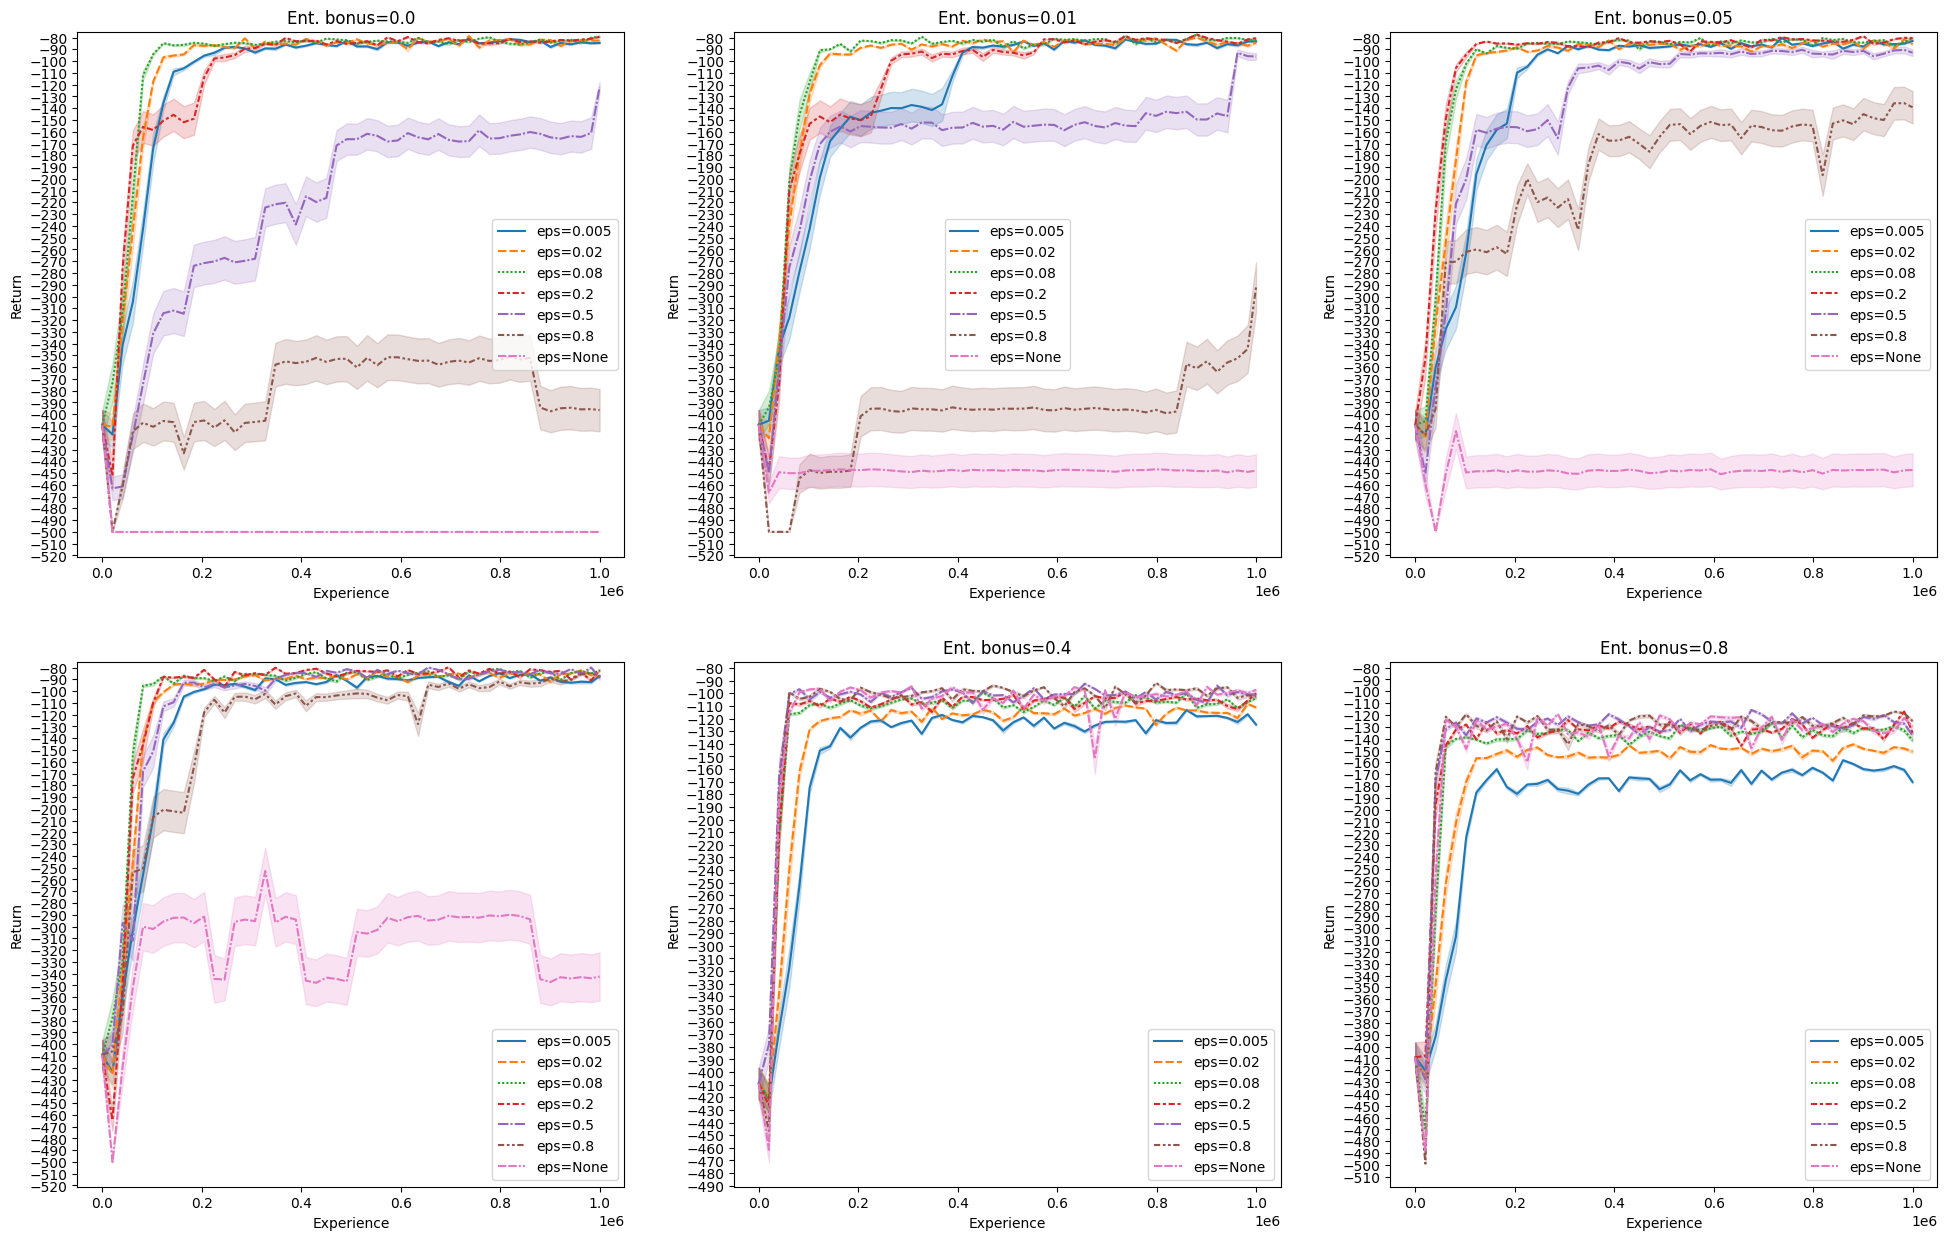

Heatmap


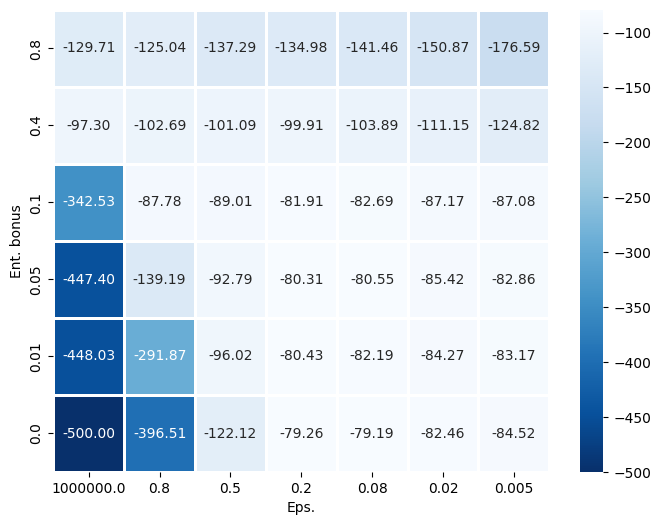

In [4]:
returns = plot_returns("Acrobot-v1", ents, clips, y_max=-75)

## 2. Asterix

Shape: (8, 6, 7, 63)
Max: 33.664062


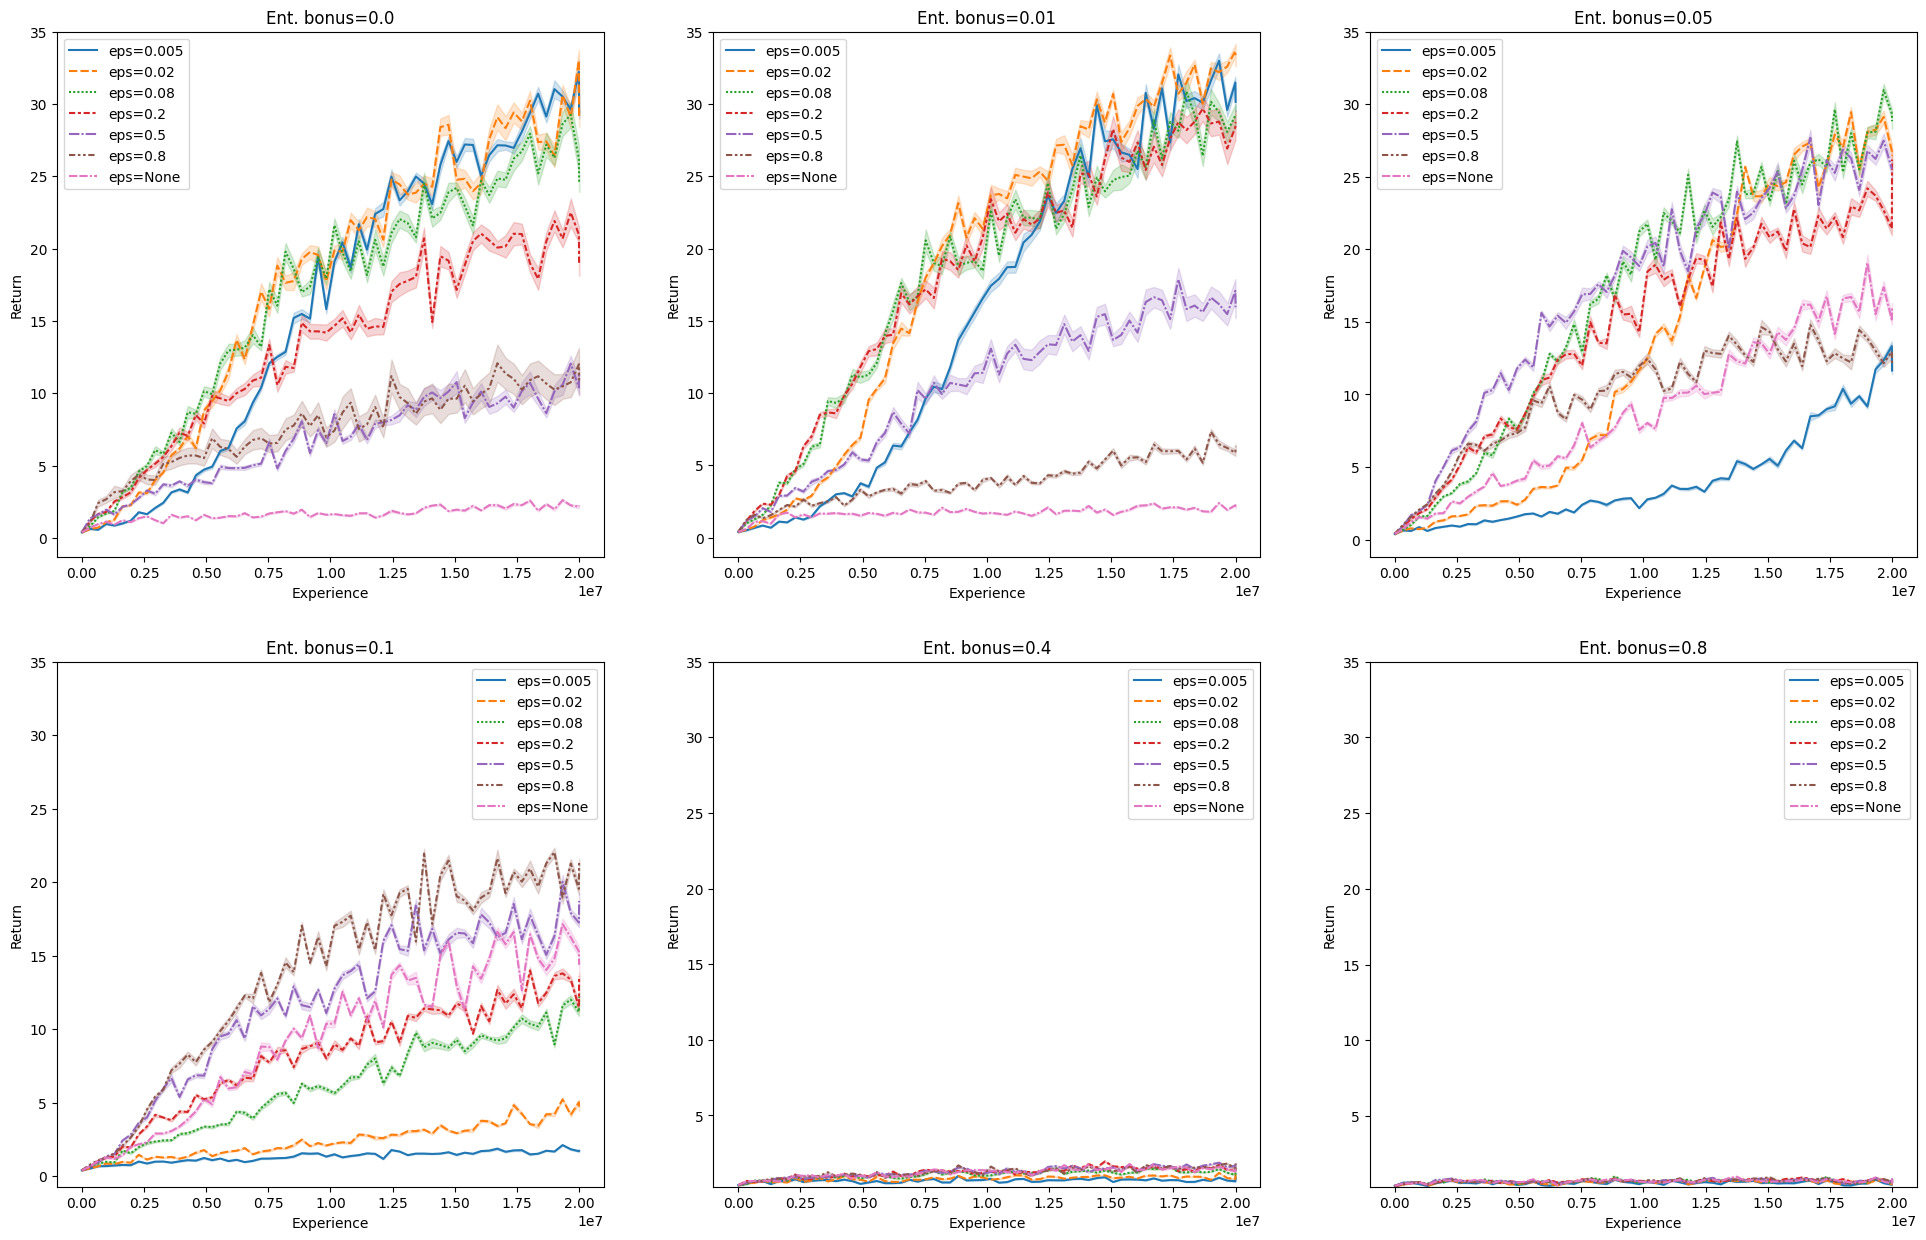

Heatmap


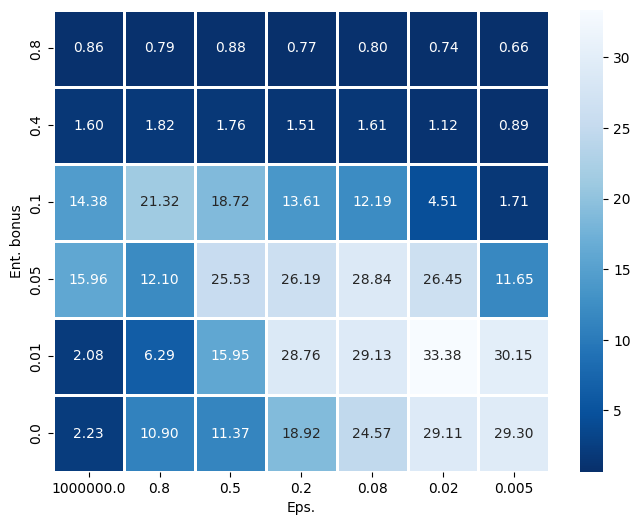

In [5]:
returns = plot_returns("Asterix-MinAtar", ents, clips, y_max=35, tick=5)

## 3. Breakout

Shape: (8, 6, 7, 63)
Max: 77.0625


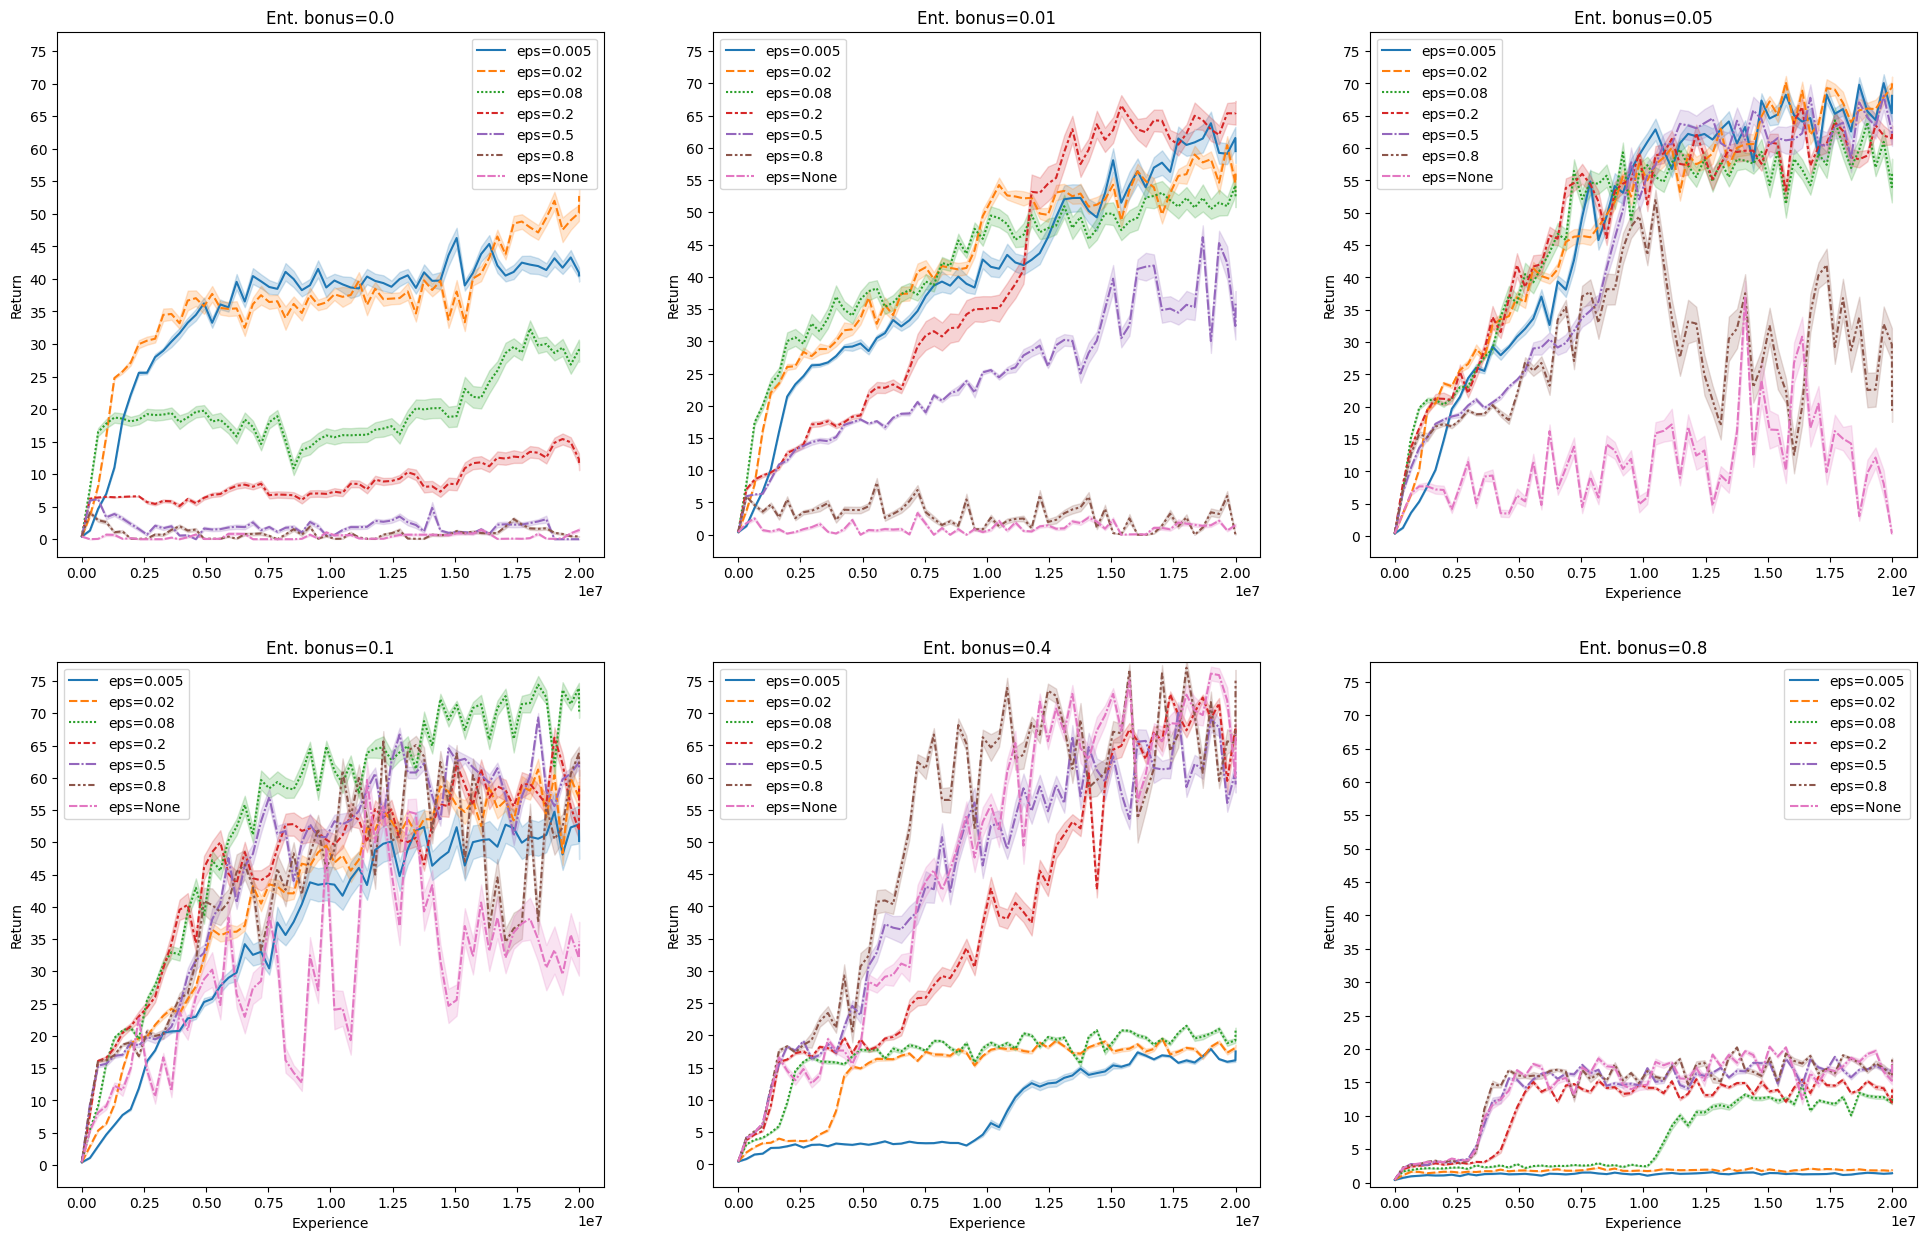

Heatmap


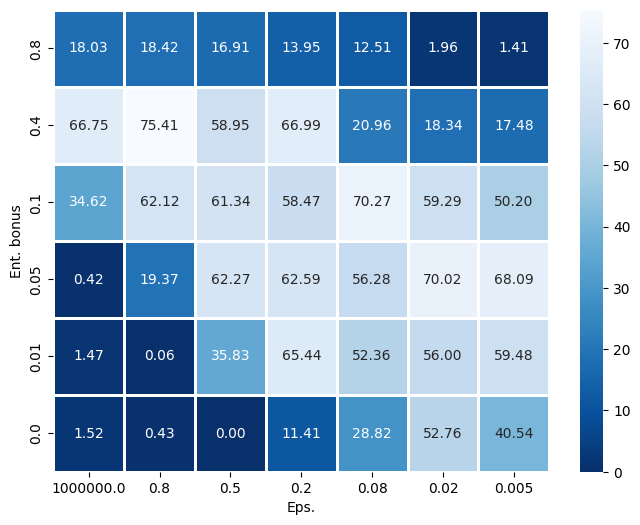

In [6]:
returns = plot_returns("Breakout-MinAtar", ents, clips, y_max=78, tick=5)

## 4. CartPole

Shape: (8, 6, 7, 31)
Max: 500.0


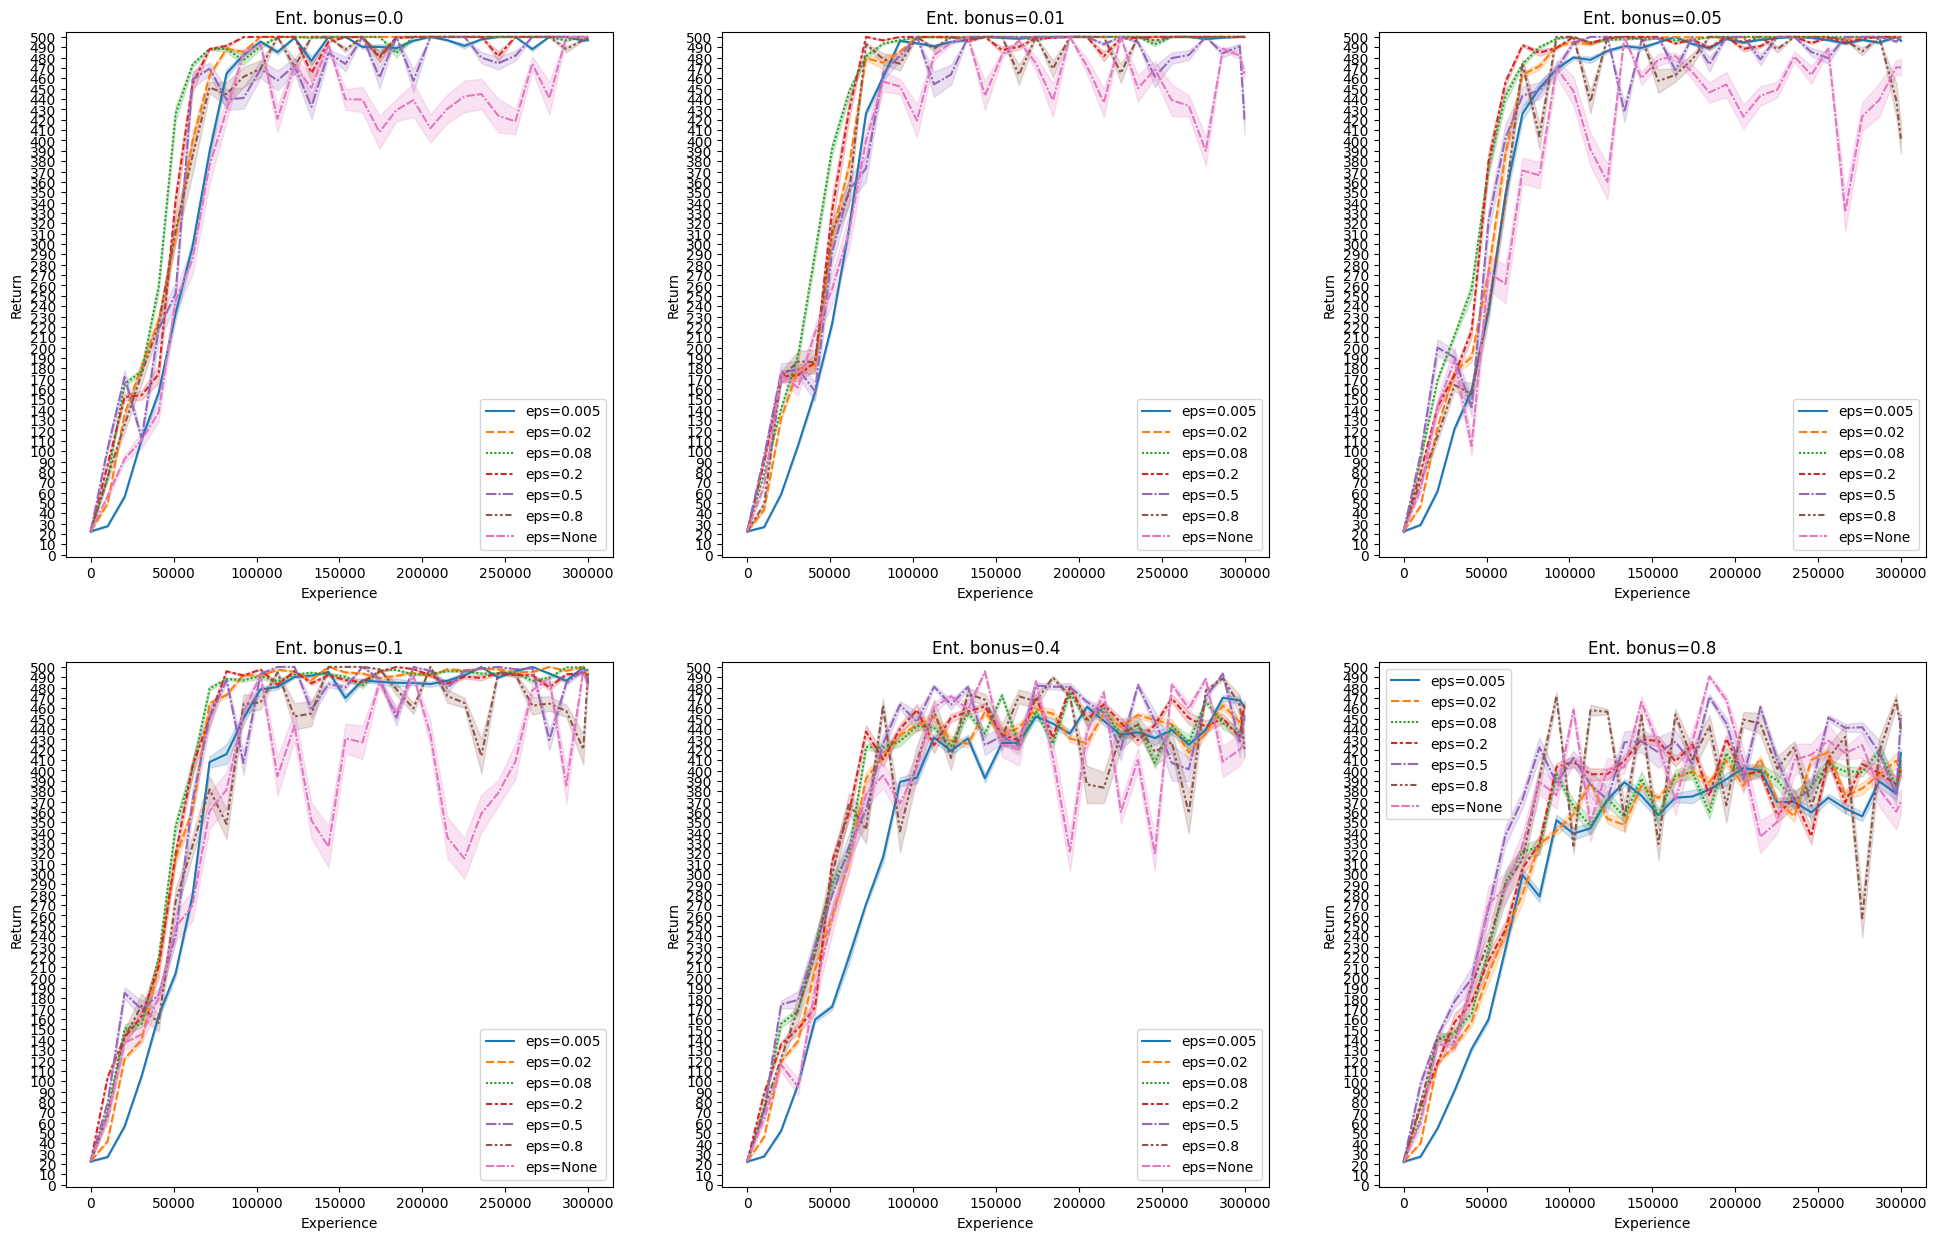

Heatmap


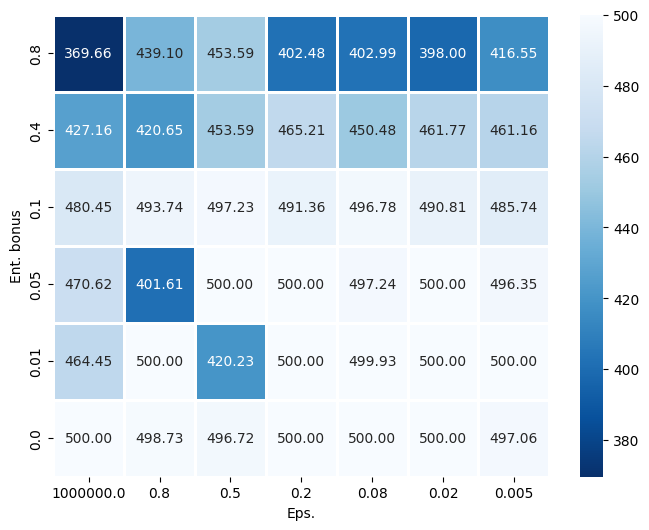

In [7]:
returns = plot_returns("CartPole-v1", ents, clips, y_max=505)

## 5. Freeway

Shape: (8, 6, 7, 63)
Max: 63.46875


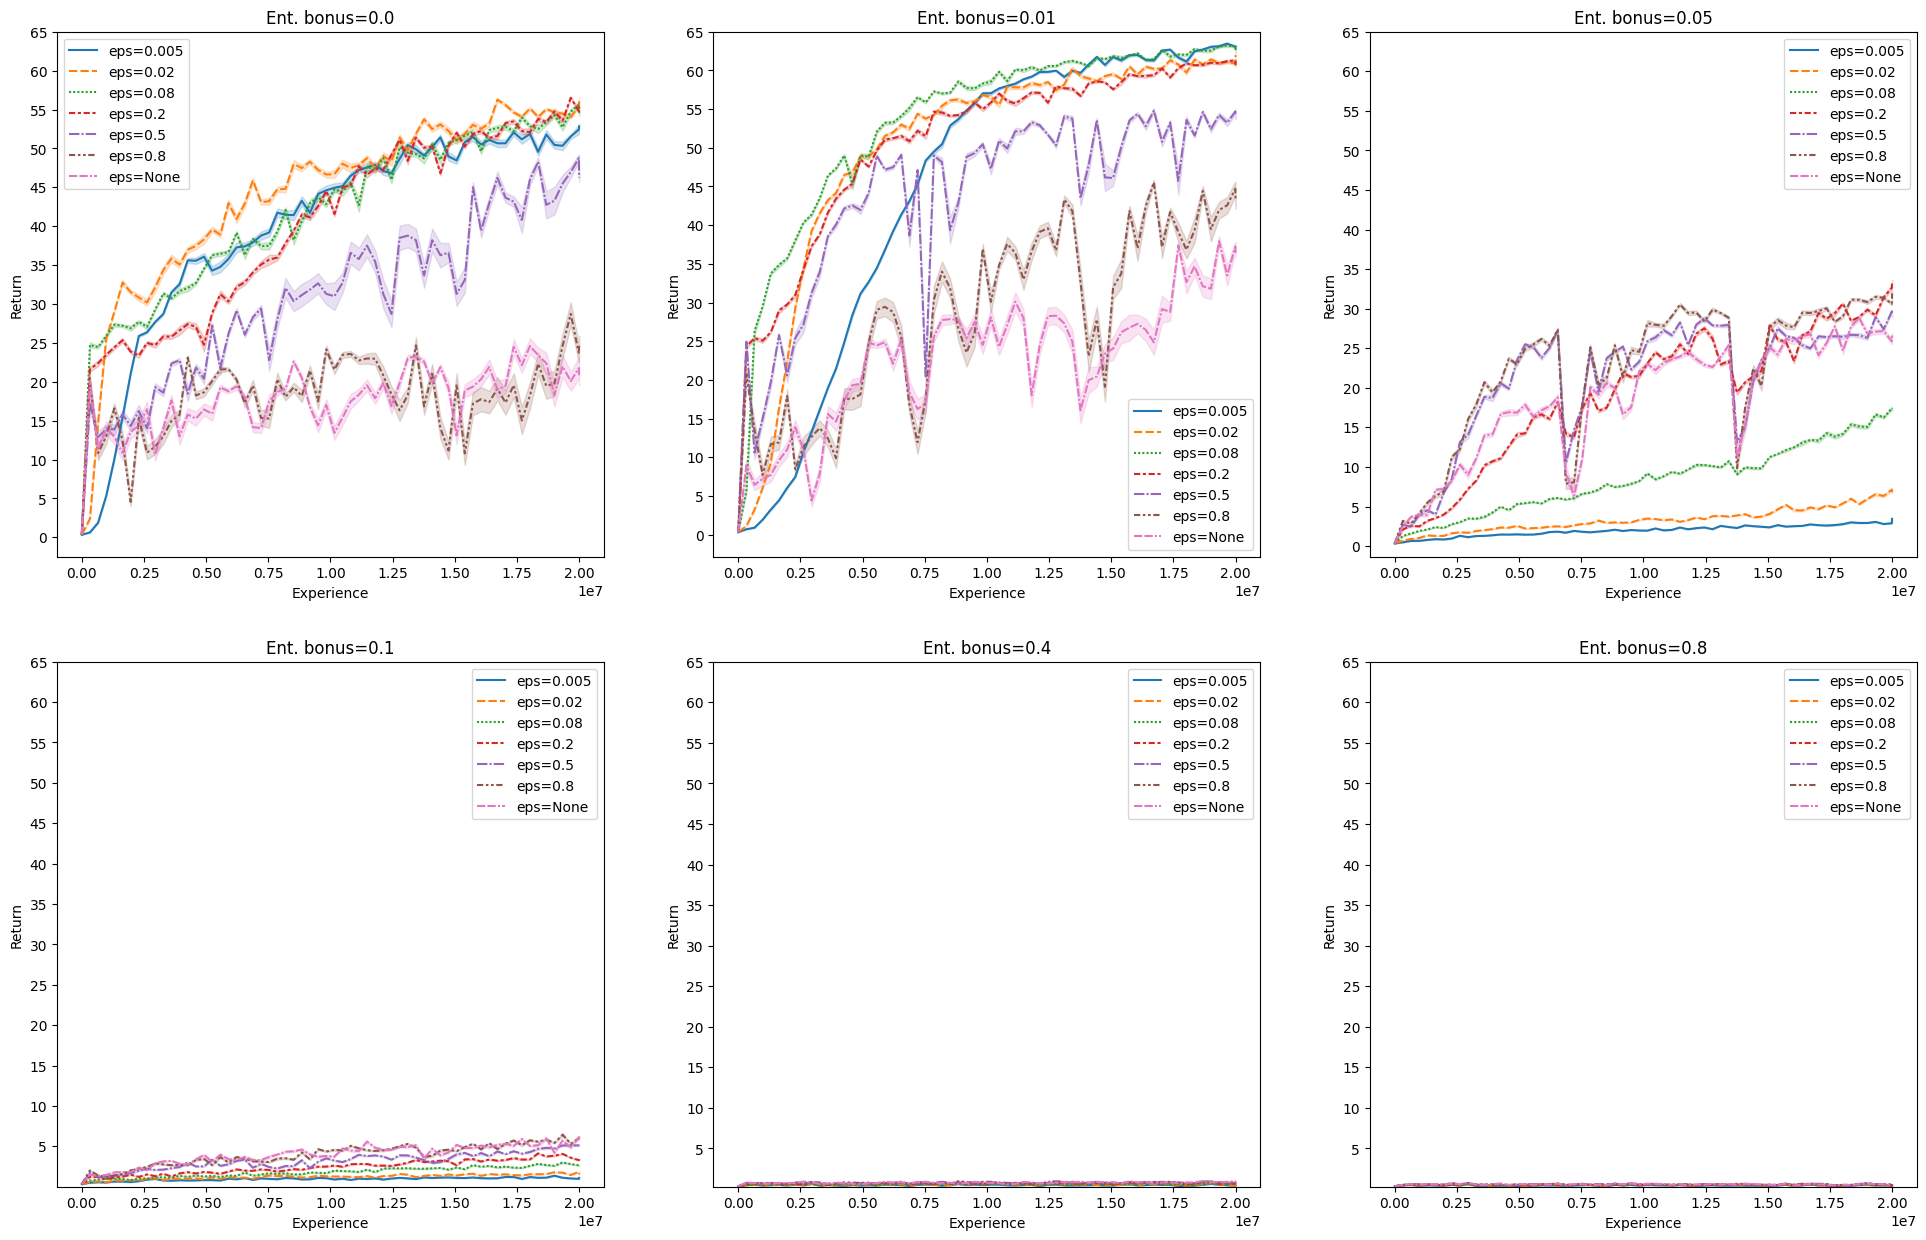

Heatmap


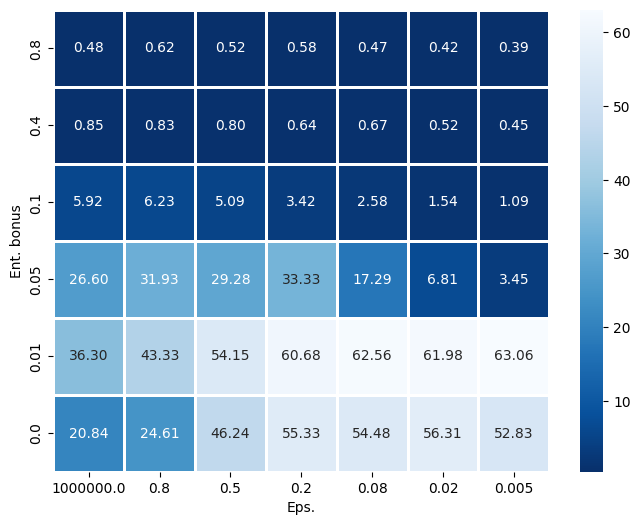

In [8]:
returns = plot_returns("Freeway-MinAtar", ents, clips, y_max=65, tick=5)

## 6. MountainCar

Shape: (8, 6, 7, 26)
Max: -101.7265625


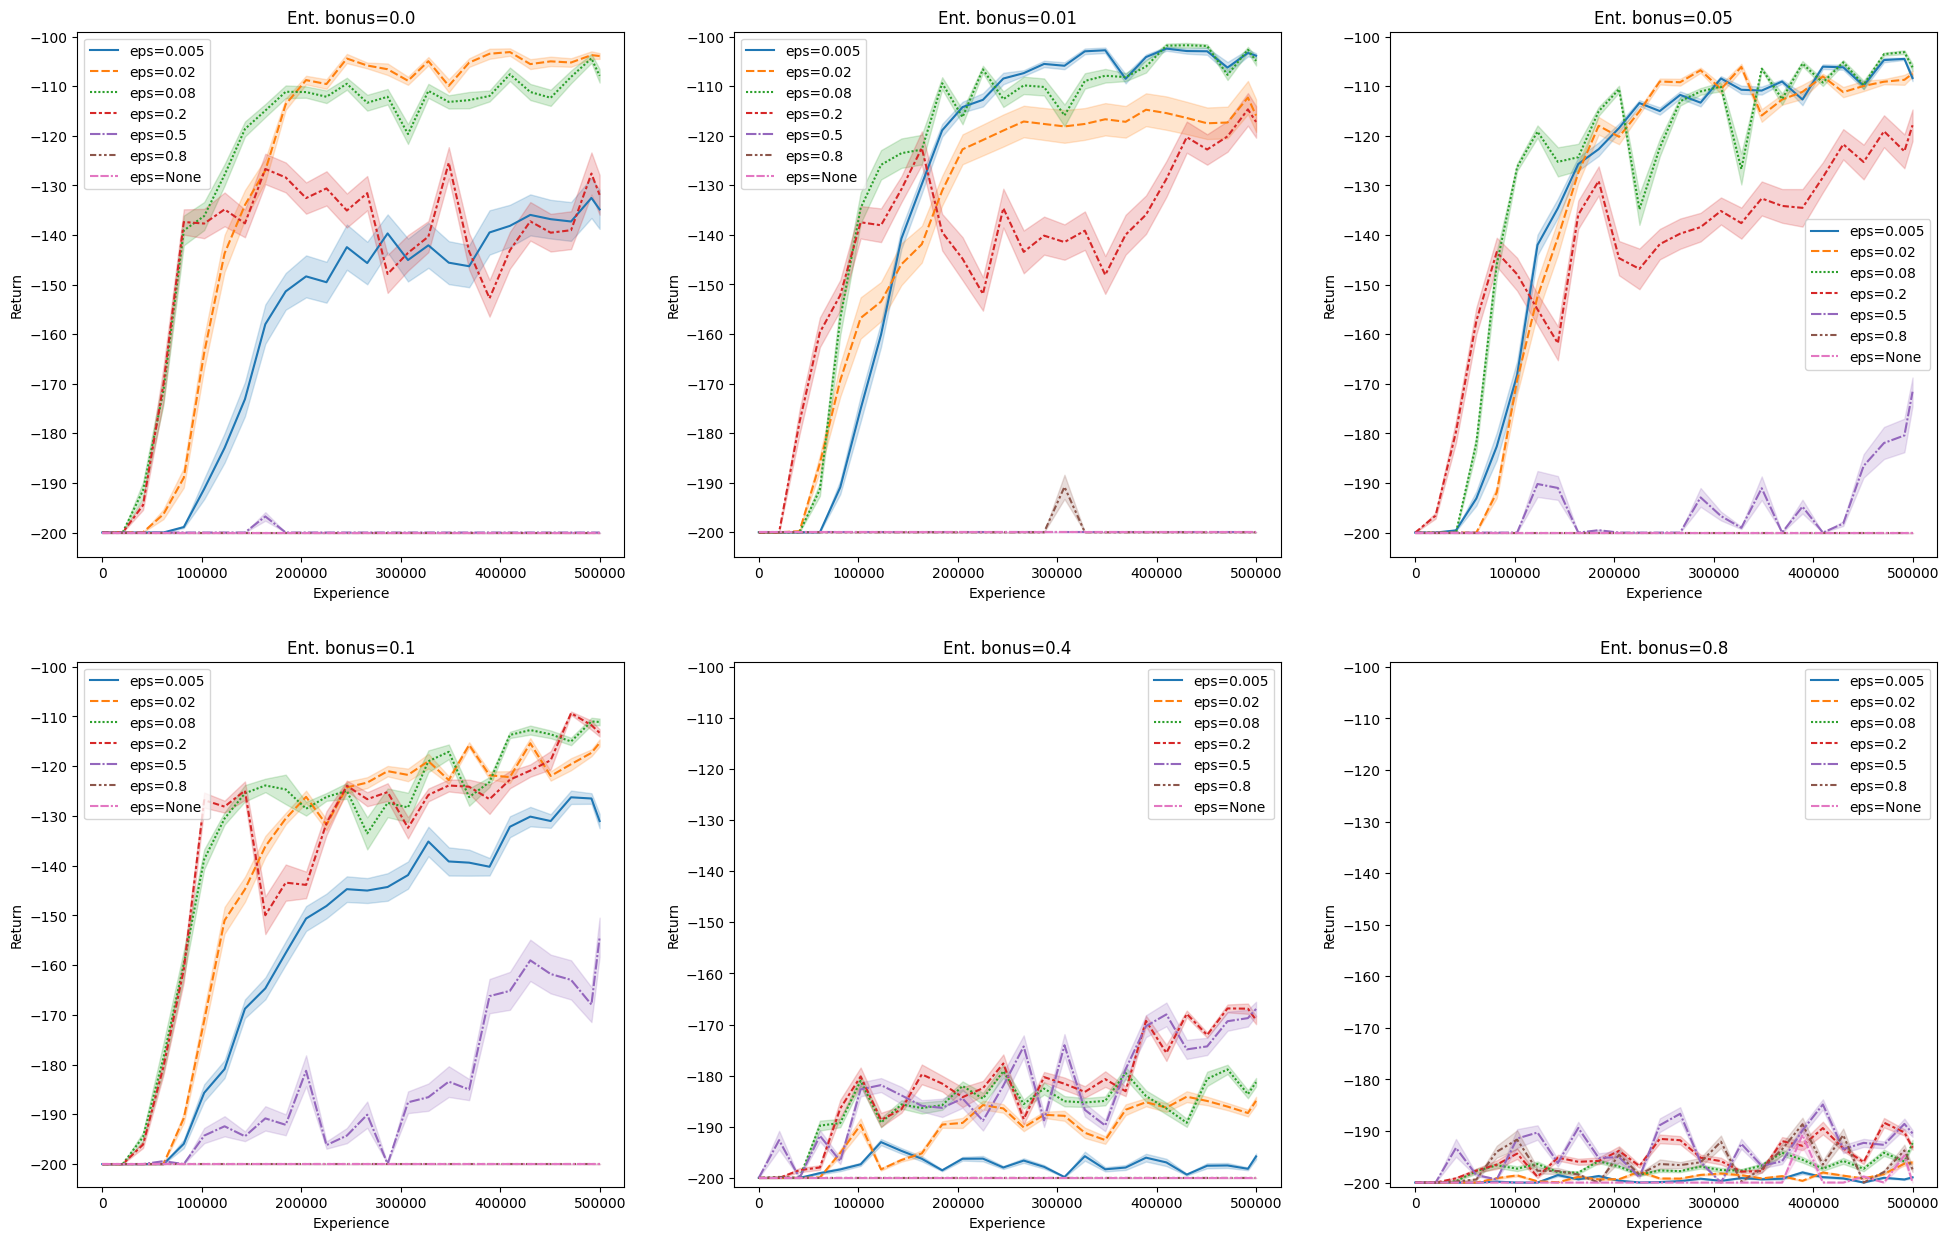

Heatmap


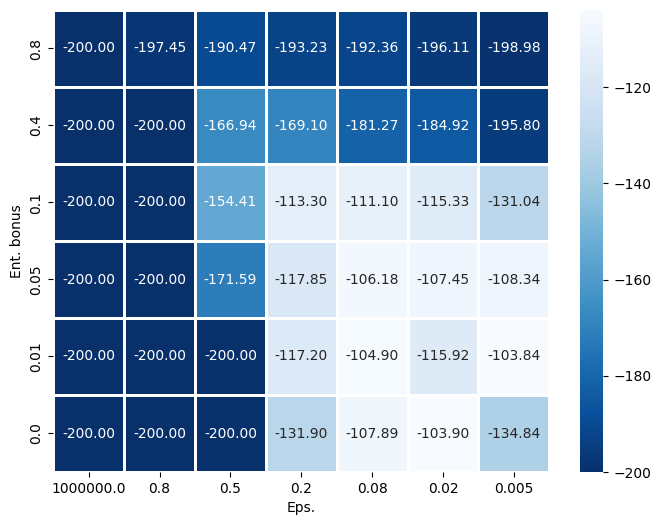

In [9]:
returns = plot_returns("MountainCar-v0", ents, clips, y_max=-99)

## 7. SpaceInvaders

Shape: (8, 6, 7, 63)
Max: 169.17188


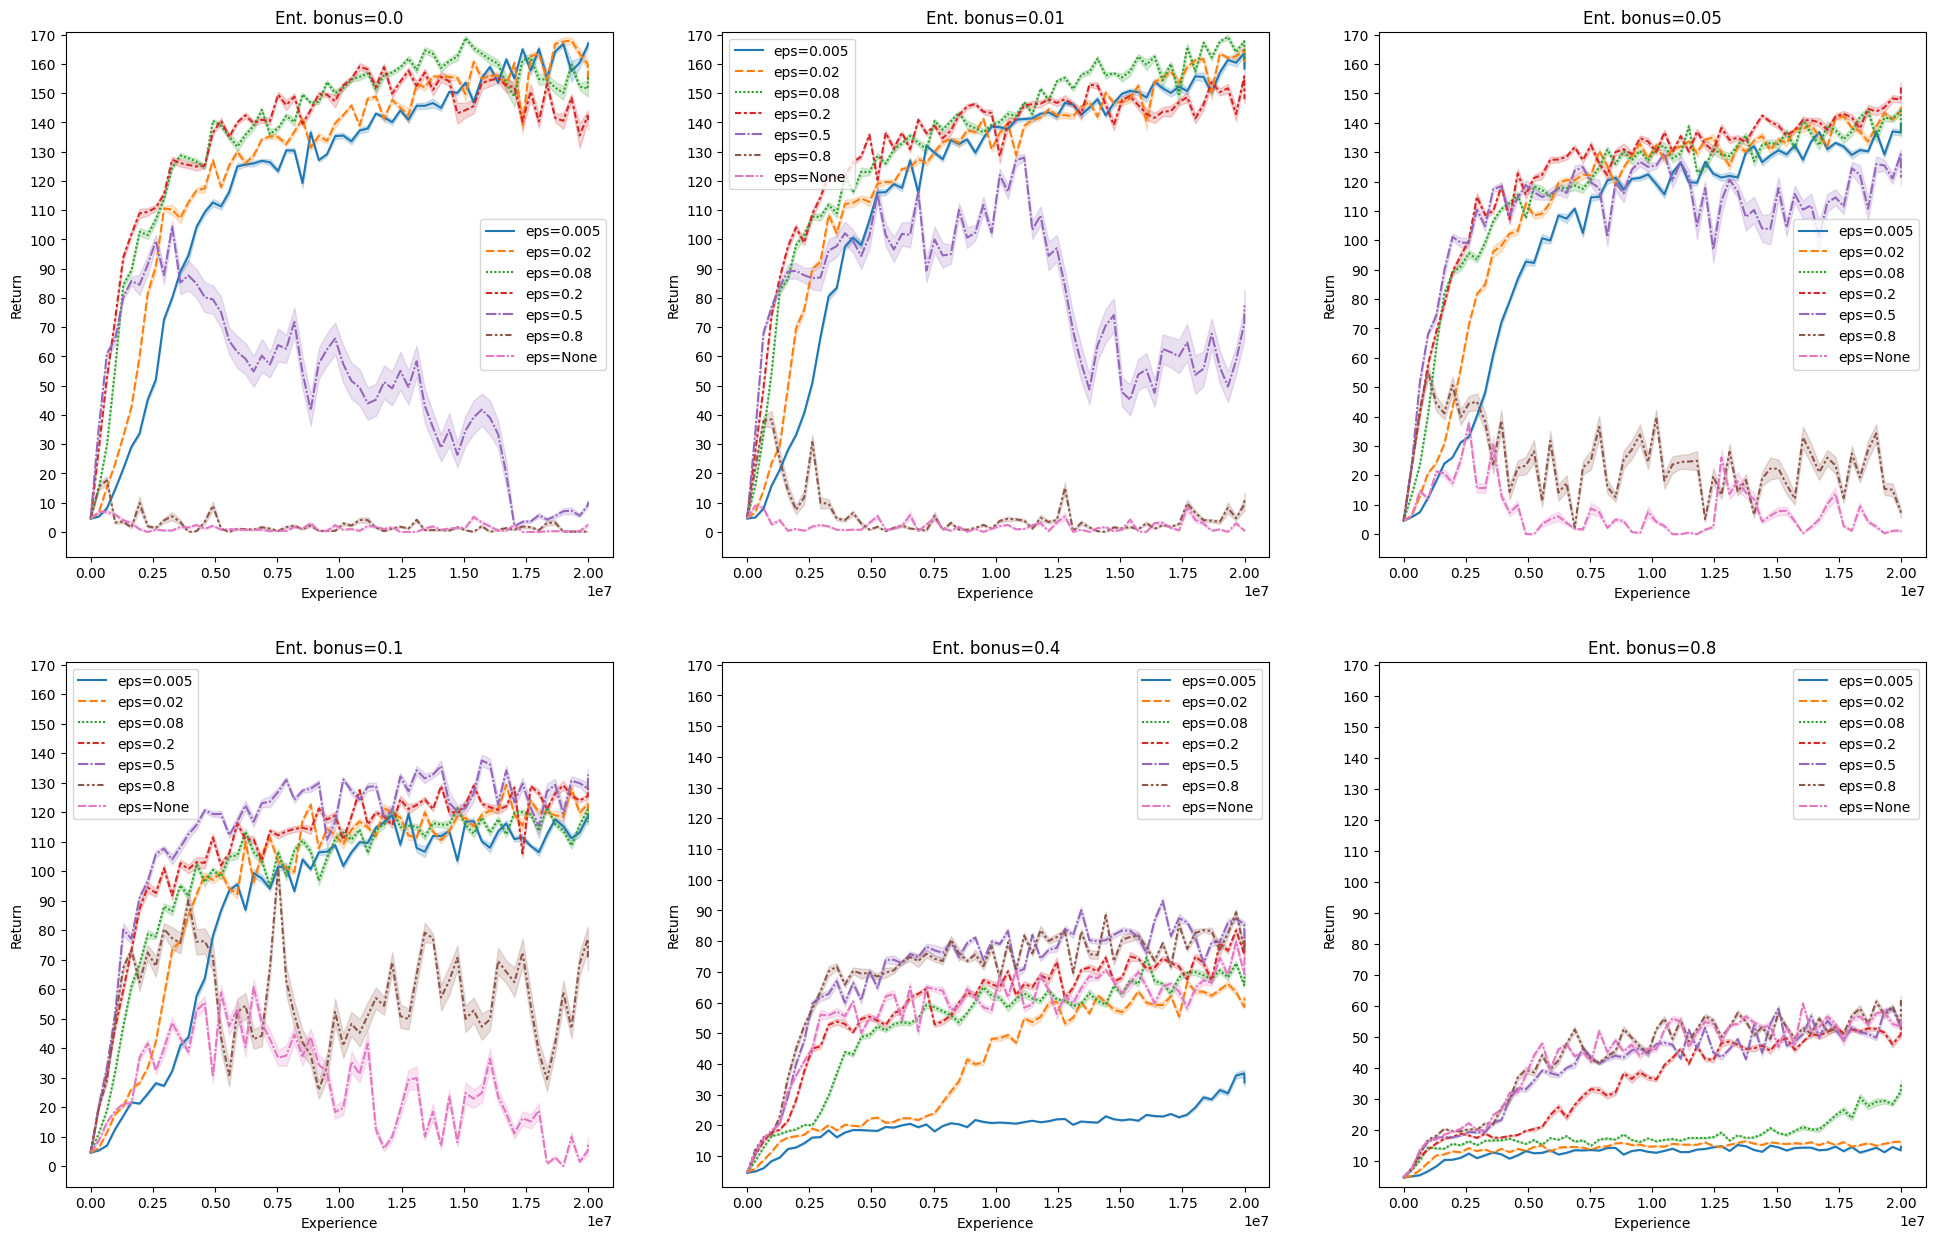

Heatmap


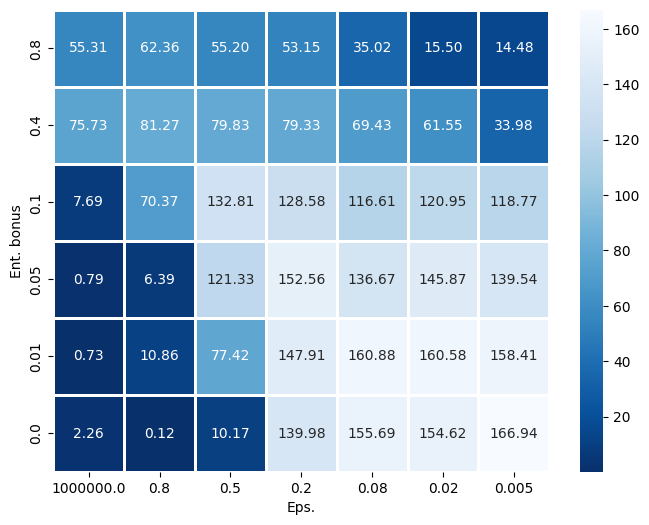

In [10]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, y_max=171)